PROGETTO SOCIAL COMPUTING 

Mancardi Devin Matricola: 159108 

Volpi Davide Matricola: 157048

Deano Luca Matricola: 159357

Gianfranco Mauro Matricola: 157548


In [1]:
#importazione Librerie Pandas,SerpApi,NetworkX

import pandas as pd #manipolazione dati
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx #creazione grafi
import pickle
import numpy as np #computazione scientifica
import serpapi as srp #recupero dati
from serpapi import GoogleScholarSearch


Importazione dataframe nodes con i 7 autori originali

In [4]:

nodes_DF = pd.read_csv("data/nodes.csv")
display(nodes_DF)

,Unnamed: 0,name,affiliations,author_id,cited_by,interests
0,0,David La Barbera,Università Degli Studi Di Udine,MvN8wKEAAAAJ,138,Computer Science
1,1,Michael Soprano,Postdoctoral Research Fellow at the University...,ocK0qRUAAAAJ,206,"Computer Science, Crowdsourcing"
2,2,Kevin Roitero,University of Udine,1xd52jMAAAAJ,688,"Artificial Intelligence, Crowdsourcing and Hum..."
3,3,Stefano Mizzaro,Full professor of Computer Science and Informa...,2wvJC6IAAAAJ,4732,"Information retrieval, mobile systems, scholar..."
4,4,Damiano Spina,School of Computing Technolgies RMIT University,sLzYrNYAAAAJ,2480,"Information Retrieval, Text Analytics, Data Sc..."
...,...,...,...,...,...,...
129,129,Pavlos Vougiouklis,Huawei Technologies,9J7YeR0AAAAJ,574,NaN
130,130,Jonathon Hare,Professor of Machine Learning and Computer Vis...,UFeON5oAAAAJ,4485,"Deep Learning, Representation Learning, Machin..."
131,131,Carlo Alberto Beltrami,"Professore, Università di Udine",EZrMWWMAAAAJ,18378,cellule staminali
132,132,Richard Gomer,University of Southampton,5ZTLglQAAAAJ,281,"privacy, consent, interaction, hci, web science"


1. A partire da nodes.csv, utilizzare la libreria Python SerpAPI per scaricare, per
ciascuno dei 7 autori elencati:
- author_id: ID identificativo del profilo Google Scholar
- cited_by: numero totale di citazioni ricevute
- interests: elenco degli interessi di ciascun autore Sfruttando la libreria Python Pandas, usare la struttura dati DataFrame per aggiornare il file originale con apposite colonne e memorizzarlo nella cartella /data.

In [ ]:

#aggiorno il datframe per inserire le colonne riguardanti Author_ID,Cited_by e interests
nodes_DF['author_id'] = ''
nodes_DF['cited_by'] = ''
nodes_DF['interests'] = ''

# Itera su ciascun autore e ottieni le informazioni da Google Scholar
for index,row in nodes_DF.iterrows():
    author_name = row['name']
    author_affiliations = row['affiliations']
    params = {
        
        "engine": "google_scholar_profiles",
        "hl":"en",
         "mauthors" :f' {author_name}, {author_affiliations}', #vado ad inserire nella query nome e affiliazione
        'api_key': '2eeff17a1dc6fb8d28f58053058d932811e0f6a82b5c510b37939a3d0f9989da',  
    }
    search = GoogleScholarSearch(params)
    results = search.get_dict()
    
    # Itera sui risultati presenti nel campo profiles e tiro fuori author_id, cited_by e interest
    for item in results['profiles']:
        author_id = item['author_id']
        cited_by = item['cited_by']
        # Inizializza una lista per gli interessi dell'autore corrente
        interests_list = []
        # Itera su ciascun interesse dell'autore corrente
        for interests in item.get('interests', []):
            title = interests.get('title', '')

            # Aggiungi il titolo all'elenco degli interessi dell'autore corrente
            interests_list.append(title)

        # Converti la lista di titoli in una stringa separata da virgole, se necessario
        interests_str = ', '.join(interests_list)

        # Aggiungi le informazioni al DataFrame
        nodes_DF.at[index, 'author_id'] = author_id
        nodes_DF.at[index, 'cited_by'] = cited_by
        nodes_DF.at[index, 'interests'] = interests_str
        
display(nodes_DF)
# Salva il DataFrame in un nuovo file CSV
nodes_DF.to_csv("data/ nodes.csv", index=False)


2. Per ciascuno dei 7 autori, utilizzare il suo ID per accedere al relativo profilo Google Scholar e scaricare l’elenco dei suoi coautori, sempre via SerpAPI. Con tale elenco di nomi:

a. Utilizzare le SerpAPI per cercare su Google Scholar un ricercatore che corrisponde a tale nome. Per ciascuno, salvare name, affiliations, author_id, cited_by e interests in un nuovo DataFrame contenente tutte queste informazioni relative ai coautori dei 7 autori originari.

b. Concatenare il DataFrame con i 7 autori originari e quello dei coautori generato al punto 2a in un unico DataFrame.
NOTA BENE: è sufficiente effettuare la ricerca dei profili per nome, non accedere al loro profilo tramite id.
ASSUNZIONE: in questo caso non potete identificare il profilo corretto tramite il valore di affiliations, quindi assumete che quello corretto sia il primo ritornato nella lista di authors.

c. Creare un terzo DataFrame con le colonne author1, author2 che rappresenta le co-authorship. In tale DataFrame, una riga rappresenta un arco di coauthorship tra due autori.
ESEMPIO: David La Barbera, Michael Soprano è una riga del DataFrame creato al punto 2c se Michael Soprano è coautore di David La Barbera. La co-authorship è binaria, non pesata.
A questo punto avrete prodotto due DataFrame:
- Uno per le informazioni relative agli autori (originali + i relativi coautori) econtenente per ciascuno di essi i valori di name, affiliations, cited_by,interests. Salvare come nodes.csv nella cartella /data tale DataFrame.
- Uno per le relazioni di co-authorship dai 7 autori principali verso i relativi coautori con colonne author1, author2. Salvare come edges.csv nella cartella /data tale DataFrame.

In [ ]:
# Inizializza un DataFrame per le informazioni sui coautori
coauthors_DF = pd.DataFrame(columns=["name", "affiliations", "author_id", "cited_by", "interests"])
#inizializzo una lista vuota dei coautori 
coauthors = []
#inizializzo una lista vuota con autore e coautori di quell'esatto autore
authors_coauthors = []
# Inizializza un DataFrame per le informazioni sugli autori e coautori
author_coauthor_df = pd.DataFrame(columns=["author", "coauthor"])
#itero su ogni id autore andando a selezionare i coautori
for index,row in nodes_DF.iterrows():
    authorID = row['author_id']
    params = {
        "engine": "google_scholar_author",
        "hl":"en",
        "author_id" : authorID,
        'api_key': '2eeff17a1dc6fb8d28f58053058d932811e0f6a82b5c510b37939a3d0f9989da',  # Sostituisci con la tua chiave API SerpAPI
    }
    search = GoogleScholarSearch(params)
    results = search.get_dict()
    author_name = row['name']
    for co_author in results["co_authors"]:
        authors_coauthors.append({
            "author" : author_name,
            "coauthor" : co_author['name']
            })
    
    # Per ogni coautore, aggiungi le informazioni al DataFrame coauthors_DF e aggiungo le informazioni alla lista temporanea
    for co_author in results["co_authors"]:
        coauthors.append({
        "name": co_author['name'],
        "author_id": co_author['author_id'],
        "affiliations": co_author.get('affiliations', '')
            
        })

# creazione datframe author and coauthor (Edges.CSV)
author_coauthor_df = pd.concat([author_coauthor_df, pd.DataFrame(authors_coauthors)], ignore_index=True)

# creazione datframe co-autori (dopo andrò a concatenarlo con Nodes.CSV)
coauthors_DF = pd.concat([coauthors_DF, pd.DataFrame(coauthors)], ignore_index=True)

# Itera su ciascun coautore e ottieni le informazioni da Google Scholar
for index,row in coauthors_DF.iterrows():
    #utilizziamo sia name che affiiations per andare a cercarci quello giusto e non andando a prendere il primo in elenco
    author_name = row['name'] 
    author_affiliations = row['affiliations']
    params = {
        "engine": "google_scholar_profiles",
        "hl":"en",
         "mauthors" :f' {author_name}, {author_affiliations}',
        'api_key': '2eeff17a1dc6fb8d28f58053058d932811e0f6a82b5c510b37939a3d0f9989da',  
    }
    search = GoogleScholarSearch(params)
    results = search.get_dict()

    # Itera su ciascun autore e ottieni le informazioni da Google Scholar
    for item in results['profiles']:
        cited_by = item['cited_by']
        # Inizializza una lista per gli interessi dell'coautore corrente
        coauthor_interests_list = []
        # Itera su ciascun interesse dell'coautore corrente
        for interests in item.get('interests', []):
            title = interests.get('title', '')

            # Aggiungi il titolo all'elenco degli interessi dell'coautore corrente
            coauthor_interests_list.append(title)

        # Converti la lista di titoli in una stringa separata da virgole, se necessario
        coauthor_interests_str = ', '.join(coauthor_interests_list)

        # Aggiungi le informazioni al DataFrame
        coauthors_DF.at[index, 'cited_by'] = cited_by
        coauthors_DF.at[index, 'interests'] = coauthor_interests_str
        

#creo il datframe finale Nodes.CSV
author_and_coauthors_DF = pd.concat([nodes_DF, coauthors_DF])
#resetto l'indice per assicurare una maggiore leggibilità
author_and_coauthors_DF = author_and_coauthors_DF.reset_index(drop ='true')

# Visualizza il DataFrame risultante
display(author_coauthor_df)
display(author_and_coauthors_DF)

#salvo i due dataframe finali
author_and_coauthors_DF.to_csv('data/nodes.csv')
author_coauthor_df.to_csv('data/edges.csv')

3. Utilizzando i due DataFrame prodotti:

a. Generare un grafo indiretto che ne rappresenta le informazioni contenute. Salvare (serializzare) il grafo in locale nella cartella /graphs .

b. Visualizzare il grafo prodotto colorando i nodi a seconda del loro grado con leseguenti colorazioni: grigio per nodi con grado uguale a 1, blu per nodi congrado compreso tra 2 e 10, viola per nodi con grado compreso tra 11 e 20,giallo per nodi con grado maggiore di 20. Inoltre, per ciascun nodo visualizzare il nome dell’autore. Salvare la visualizzazione nella cartella /visualizations

In [ ]:
nodes_DF = pd.read_csv("data/nodes.csv")
#display(nodes_DF)
nodes_DF1 = nodes_DF.drop_duplicates(subset='name')
edges_DF = pd.read_csv("data/edges.csv")
#display(edges_DF)

# Crea il grafo
G = nx.from_pandas_edgelist(edges_DF, 'author', 'coauthor', create_using=nx.Graph())

# Aggiungi attributi ai nodi
for index, row in nodes_DF1.iterrows():
    author = row['name']
    G.nodes[author]['affiliations'] = row['affiliations']
    G.nodes[author]['cited_by'] = row['cited_by']
    G.nodes[author]['interests'] = row['interests']


# Salva il grafo
with open('graphs/ graphs.pickle', 'wb')as f:
    pickle.dump(G, f, pickle.HIGHEST_PROTOCOL)

#Lettura del grafo
with open('graphs/ graphs.pickle', 'rb') as f:
    G = pickle.load(f)

node_colors = []
node_labels = {}
for node, degree in G.degree():
    if degree == 1:
        node_colors.append('gray')
    elif 2 <= degree <= 10:
        node_colors.append('blue')
    elif 11 <= degree <= 20:
        node_colors.append('purple')
    else:
        node_colors.append('yellow')

    node_labels[node] = node

pos = nx.spring_layout(G)

plt.figure(figsize=(13, 13))
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, width = 1, font_size=10, node_size = 100)

# Salva la visualizzazione
plt.savefig('visualizations/ graph.png')
plt.show()

4. A partire dal grafo prodotto al punto 3:
a. Generarne un secondo dove il numero di nodi è lo stesso, mentre il numero di archi è aumentato di 50 utilizzando la tecnica del Preferential Attachment. Salvare il grafo in locale nella cartella /graphs.

b. Visualizzare e salvare il nuovo grafo come fatto al punto 3b.

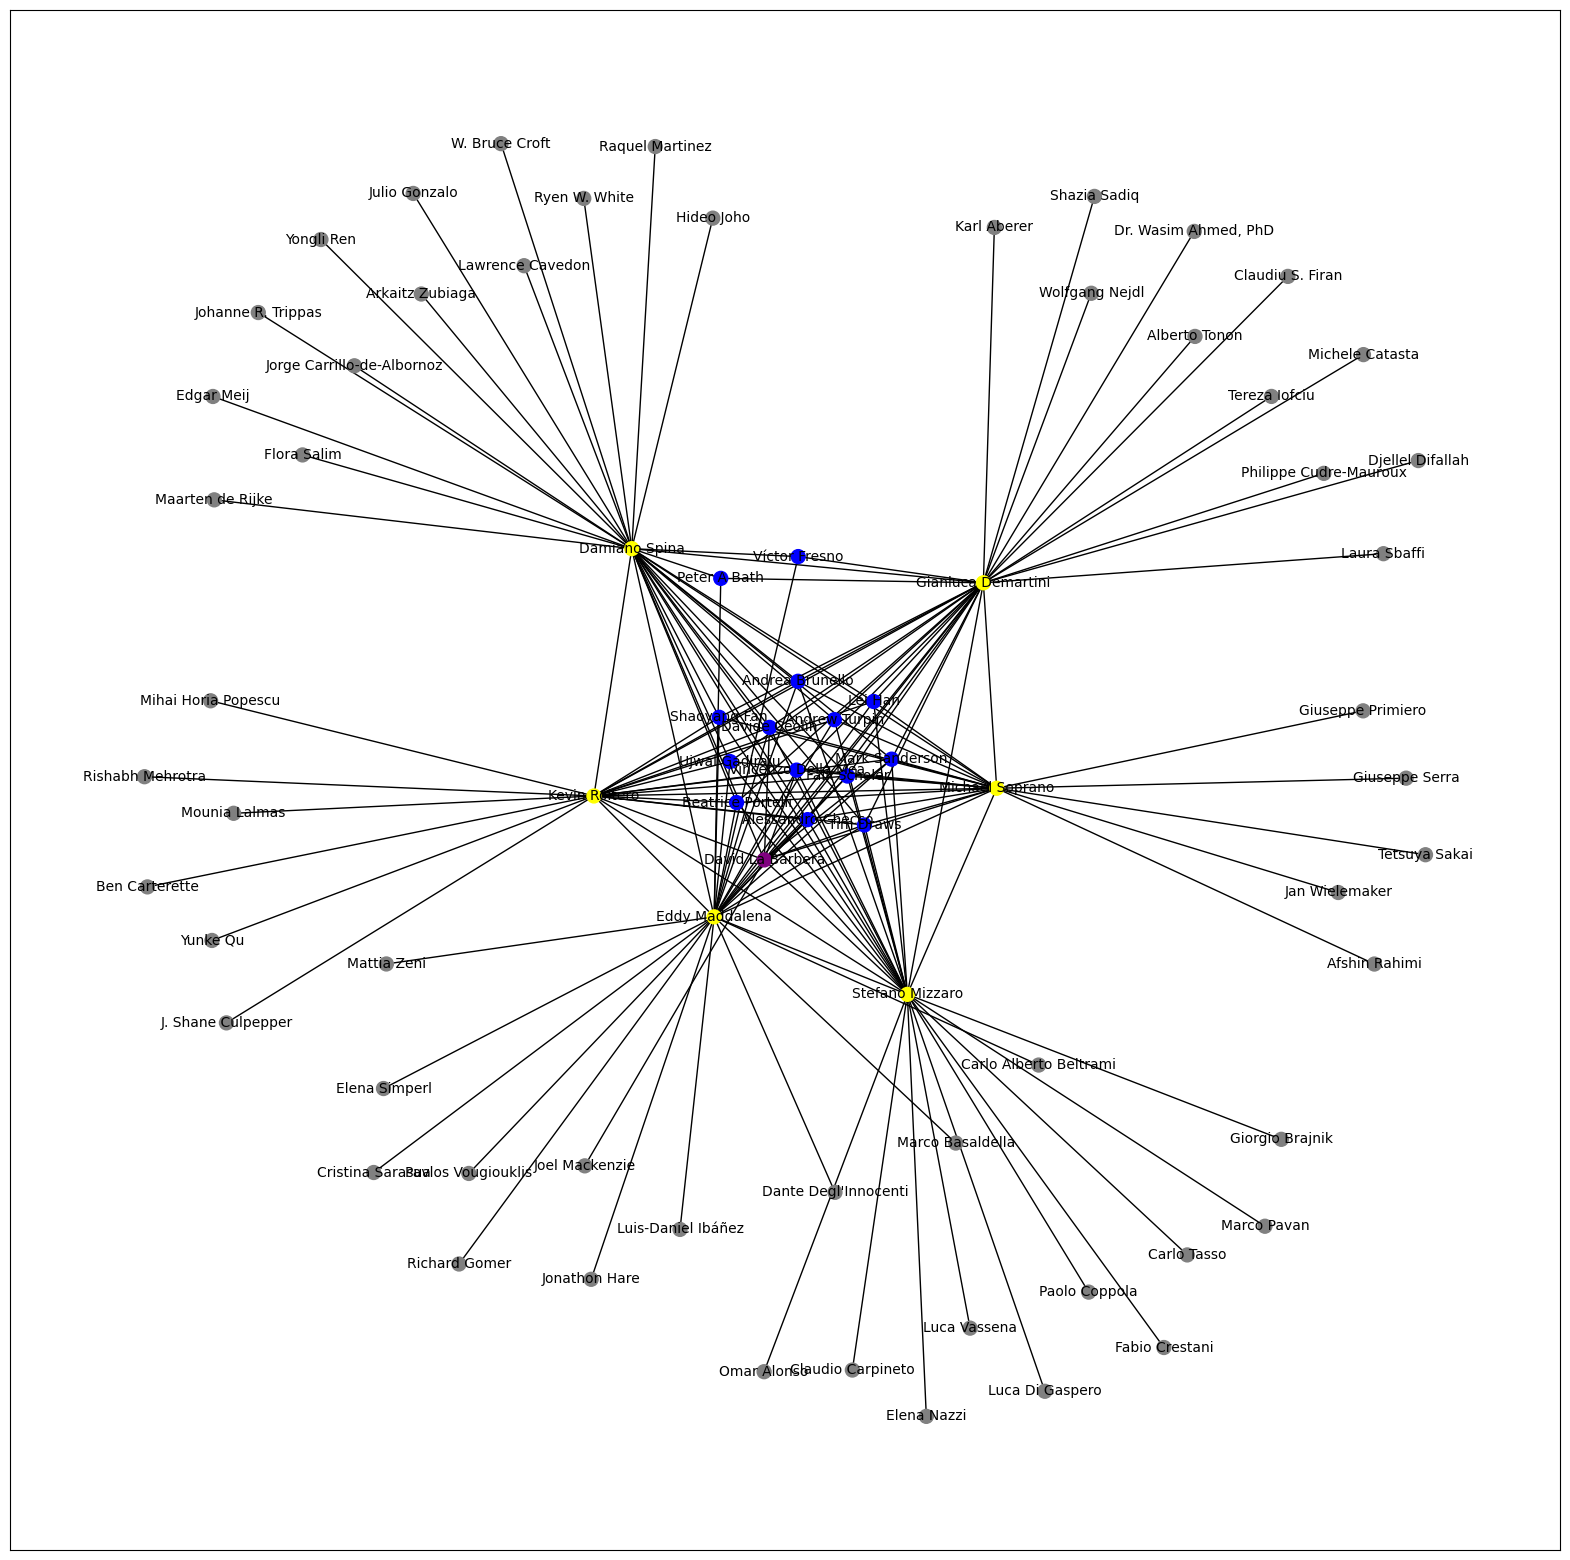

In [65]:
# Leggi il grafo esistente
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

# Genera un nuovo grafo con gli stessi nodi
G_Prefential_Attachment = G.copy()

# Numero di archi da aggiungere usando il Preferential Attachment  
num_edges_to_add = 50   
                                          
# Calcolo i punteggi di Preferential Attachment per tutte le coppie di nodi
pa_scores = list(nx.preferential_attachment(G_Prefential_Attachment))


# Ordino le coppie di nodi in base ai punteggi di Preferential Attachment in ordine decrescente
pa_scores.sort(key=lambda x: x[2], reverse=True)

# Aggiungo archi in base ai punteggi di Preferential Attachment
for i in range(num_edges_to_add):
    node1, node2, _ = pa_scores[i]
    G_Prefential_Attachment.add_edge(node1, node2)

# Salva il nuovo grafo
with open('graphs/graphs_preferential_attachment.pickle', 'wb') as f:
    pickle.dump(G_Prefential_Attachment, f, pickle.HIGHEST_PROTOCOL)

# Leggi il nuovo grafo
with open('graphs/graphs_preferential_attachment.pickle', 'rb') as f:
    G_Prefential_Attachment = pickle.load(f)


# Visualizzazione del nuovo grafo
node_colors_new = []
node_labels_new = {}
for node, degree in G_Prefential_Attachment.degree():
    if degree == 1:
        node_colors_new.append('gray')
    elif 2 <= degree <= 10:
        node_colors_new.append('blue')
    elif 11 <= degree <= 20:
        node_colors_new.append('purple')
    else:
        node_colors_new.append('yellow')

    node_labels_new[node] = node

plt.figure(figsize=(20,20))
nx.draw_networkx(G_Prefential_Attachment, pos=nx.spring_layout(G_Prefential_Attachment), with_labels=True, node_color=node_colors_new,
                 width=1, font_size=10, node_size=100)

# Salva la visualizzazione del nuovo grafo
plt.savefig('visualizations/graph_preferential_attachment.png')
plt.show()

Creazione grafo con metodo preferential attachment corretto che prende in considerazione anche il grado dei nodi 

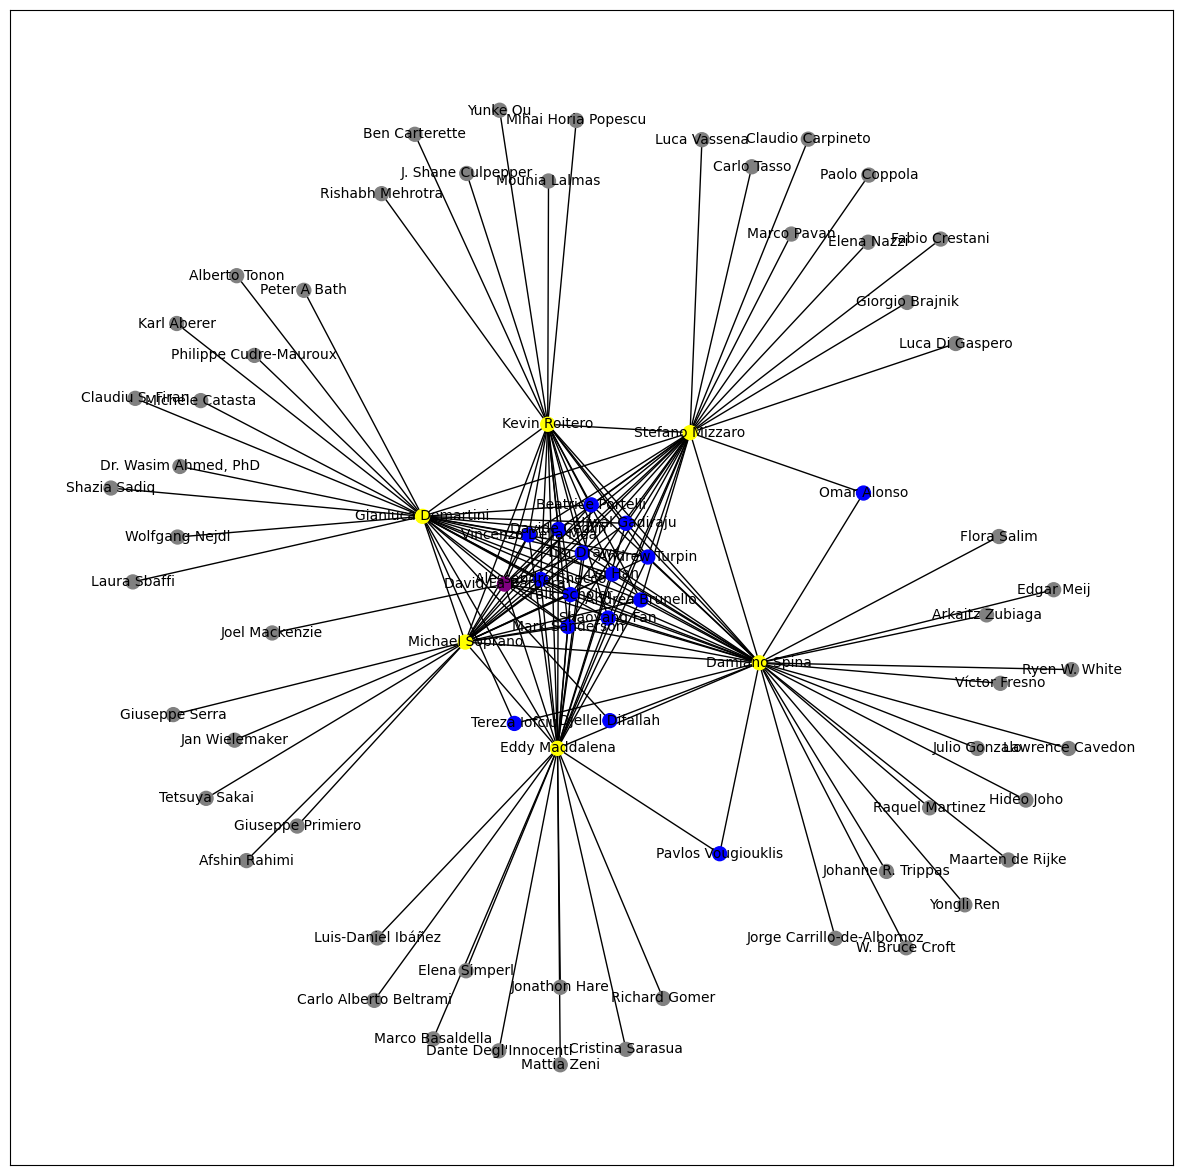

In [72]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Leggi il grafo esistente
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

# Genera un nuovo grafo con gli stessi nodi
G_Preferential_Attachment = G.copy()

# Numero di archi da aggiungere usando il Preferential Attachment
num_edges_to_add = 50

# Calcolo i punteggi di Preferential Attachment per tutte le coppie di nodi
pa_scores = [(node1, node2, score) for node1, node2, score in nx.preferential_attachment(G_Preferential_Attachment)]

# Calcolo il grado di ogni nodo nel grafo
degree_dict = dict(G_Preferential_Attachment.degree())

# Ordina le coppie in base ai punteggi di Preferential Attachment e ai gradi in ordine decrescente
sorted_pa_scores = sorted(pa_scores, key=lambda x: (x[2], degree_dict[x[0]], degree_dict[x[1]]), reverse=True)

# Aggiungi i primi 50 archi in base ai punteggi di Preferential Attachment e ai gradi
for i in range(num_edges_to_add):
    edge = sorted_pa_scores[i]
    G_Preferential_Attachment.add_edge(edge[0], edge[1])

# Salva il nuovo grafo
with open('graphs/graph_preferential_attachment_ordered.pickle', 'wb') as f:
    pickle.dump(G_Preferential_Attachment, f, pickle.HIGHEST_PROTOCOL)

# Leggi il nuovo grafo
with open('graphs/graph_preferential_attachment_ordered.pickle', 'rb') as f:
    G_Preferential_Attachment = pickle.load(f)

# Visualizzazione del nuovo grafo
node_colors_new = []
node_labels_new = {}
for node, degree in G_Preferential_Attachment.degree():
    if degree == 1:
        node_colors_new.append('gray')
    elif 2 <= degree <= 10:
        node_colors_new.append('blue')
    elif 11 <= degree <= 20:
        node_colors_new.append('purple')
    else:
        node_colors_new.append('yellow')

    node_labels_new[node] = node

plt.figure(figsize=(15, 15))
nx.draw_networkx(G_Preferential_Attachment, pos=nx.spring_layout(G_Preferential_Attachment), with_labels=True, node_color=node_colors_new,
                 width=1, font_size=10, node_size=100)

# Salva la visualizzazione del nuovo grafo
plt.savefig('visualizations/graph_preferential_attachment_ordered.png')
plt.show()


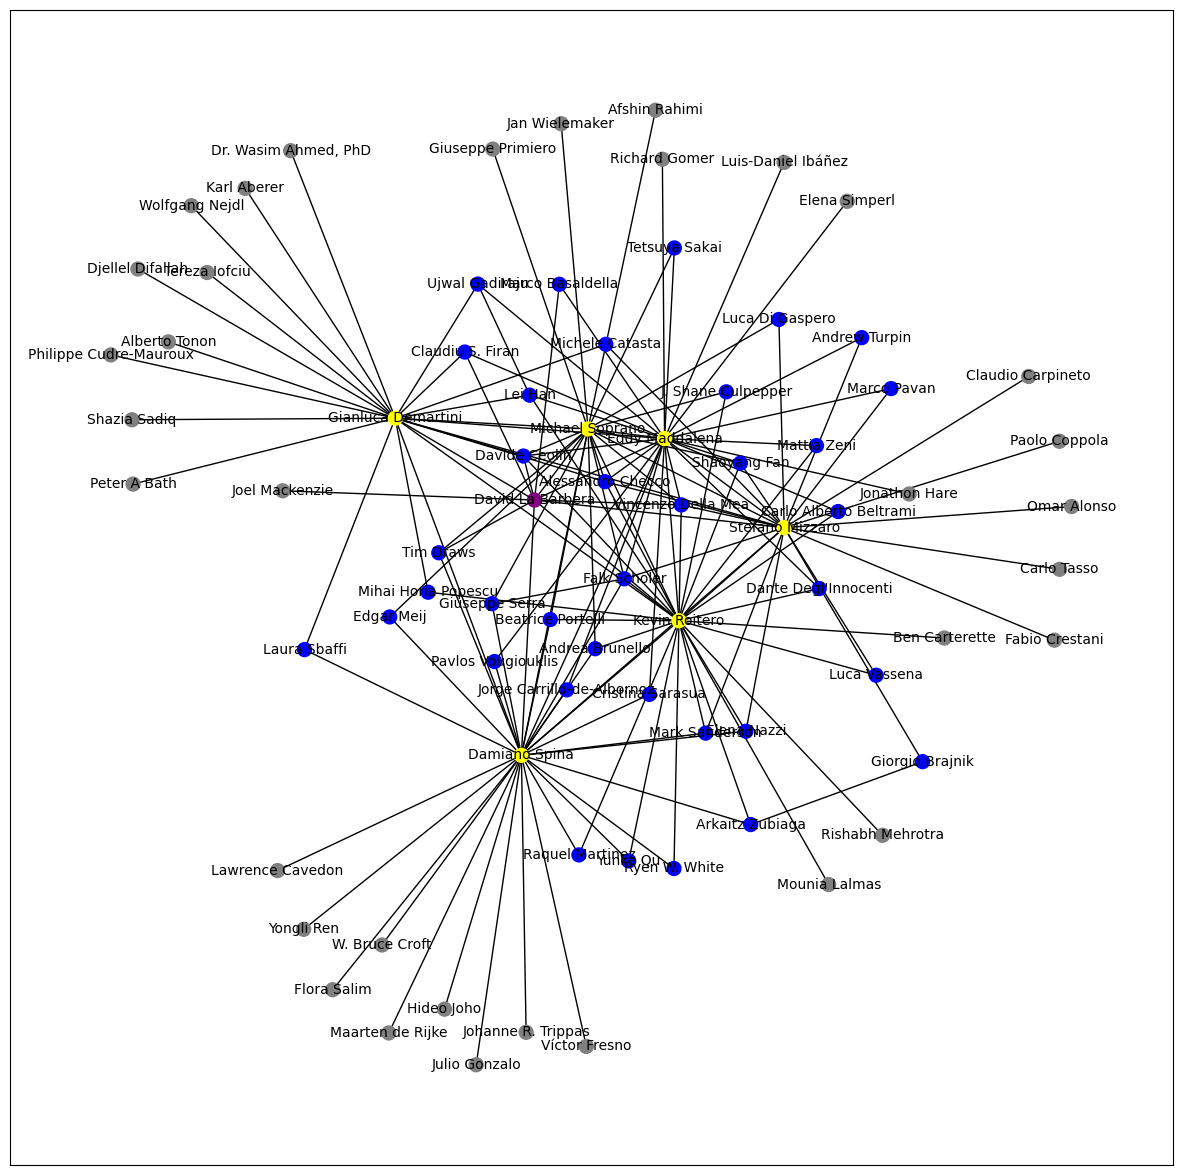

In [70]:


# Leggi il grafo esistente
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

# Genera un nuovo grafo con gli stessi nodi
G_Preferential_Attachment = G.copy()

# Numero di archi da aggiungere usando il Preferential Attachment
num_edges_to_add = 50

# Calcolo i punteggi di Preferential Attachment per tutte le coppie di nodi
pa_scores = [(node1, node2, score) for node1, node2, score in nx.preferential_attachment(G_Preferential_Attachment)]

# Calcolo il grado di ogni nodo nel grafo
degree_dict = dict(G_Preferential_Attachment.degree())

# Calcolo la somma dei gradi dei nodi nel grafo
total_degree = sum(degree_dict.values())

# Aggiungo archi in base ai punteggi di Preferential Attachment considerando il grado dei nodi
for i in range(num_edges_to_add):
    # Calcolo la probabilità di connessione tra i nodi basata sul Preferential Attachment e sul grado
    probabilities = [(node1, node2, score * (degree_dict[node1] + degree_dict[node2]) / (2 * total_degree))
                     for node1, node2, score in pa_scores]
    
    chosen_edge = random.choices(probabilities, weights=[p[2] for p in probabilities])[0]

    # Aggiungo l'arco al grafo
    G_Preferential_Attachment.add_edge(chosen_edge[0], chosen_edge[1])

# Salva il nuovo grafo
with open('graphs/graph_preferential_attachment.pickle', 'wb') as f:
    pickle.dump(G_Preferential_Attachment, f, pickle.HIGHEST_PROTOCOL)

# Leggi il nuovo grafo
with open('graphs/graph_preferential_attachment.pickle', 'rb') as f:
    G_Preferential_Attachment = pickle.load(f)

# Visualizzazione del nuovo grafo
node_colors_new = []
node_labels_new = {}
for node, degree in G_Preferential_Attachment.degree():
    if degree == 1:
        node_colors_new.append('gray')
    elif 2 <= degree <= 10:
        node_colors_new.append('blue')
    elif 11 <= degree <= 20:
        node_colors_new.append('purple')
    else:
        node_colors_new.append('yellow')

    node_labels_new[node] = node

plt.figure(figsize=(15, 15))
nx.draw_networkx(G_Preferential_Attachment, pos=nx.spring_layout(G_Preferential_Attachment), with_labels=True, node_color=node_colors_new,
                 width=1, font_size=10, node_size=100)

# Salva la visualizzazione del nuovo grafo
plt.savefig('visualizations/graph_preferential_attachment.png')
plt.show()


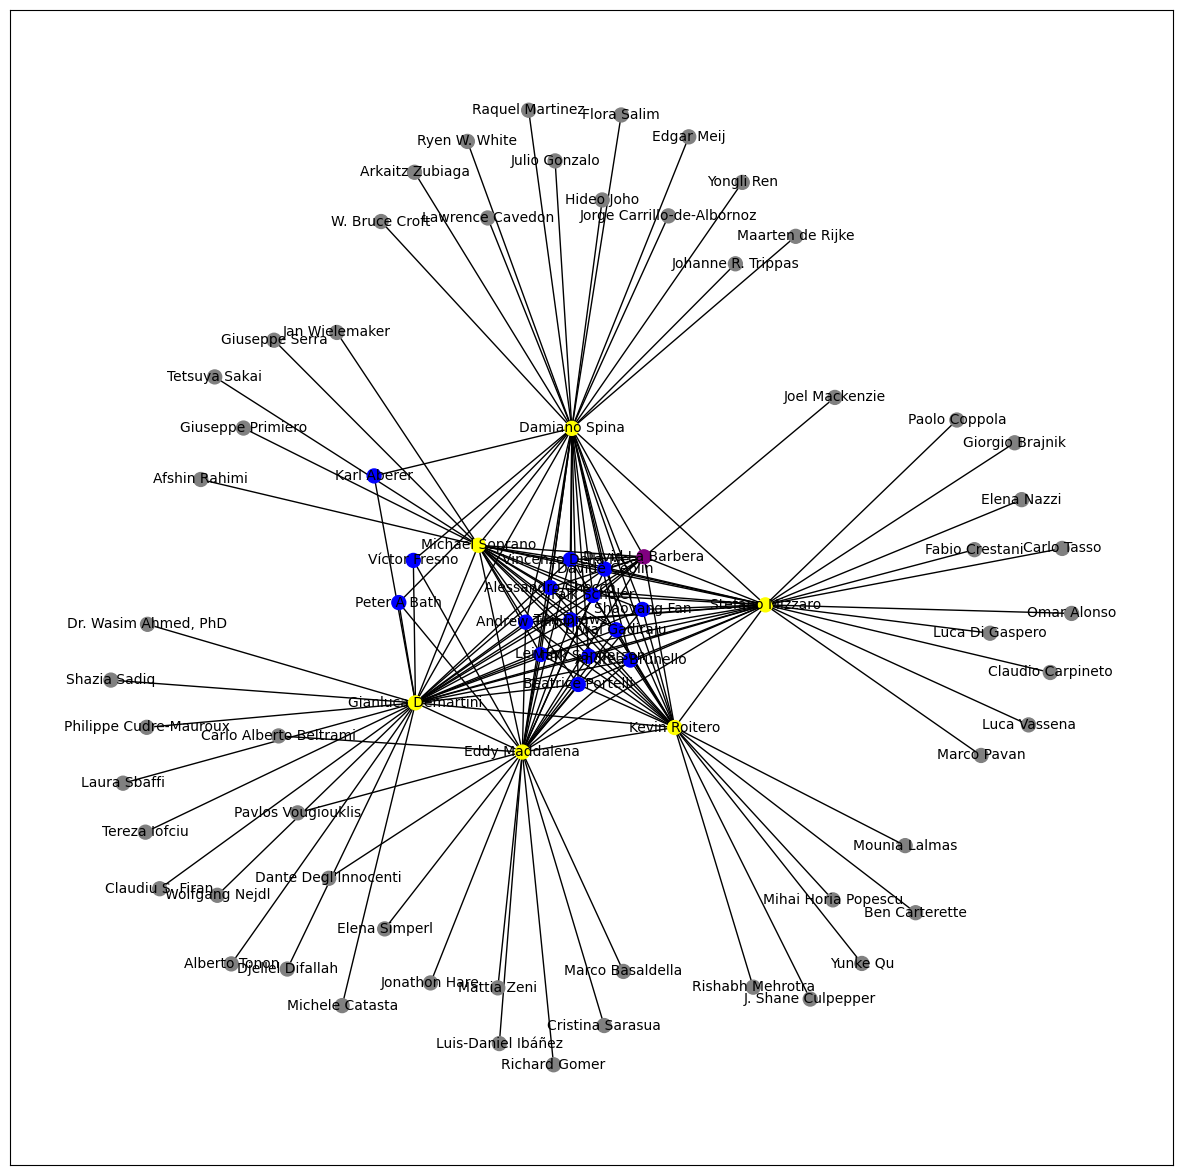

In [71]:


# Leggi il grafo esistente
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

# Genera un nuovo grafo con gli stessi nodi
G_Preferential_Attachment = G.copy()

# Numero di archi da aggiungere usando il Preferential Attachment
num_edges_to_add = 50

# Calcolo i punteggi di Preferential Attachment per tutte le coppie di nodi
pa_scores = [(node1, node2, score) for node1, node2, score in nx.preferential_attachment(G_Preferential_Attachment)]

# Calcolo il grado di ogni nodo nel grafo
degree_dict = dict(G_Preferential_Attachment.degree())

# Calcolo la somma dei gradi dei nodi nel grafo
total_degree = sum(degree_dict.values())

# Calcolo la probabilità di connessione tra i nodi basata sul Preferential Attachment e sul grado
probabilities = [(node1, node2, score * (degree_dict[node1] + degree_dict[node2]) / (2 * total_degree))
                 for node1, node2, score in pa_scores]

# Ordina la lista probabilities in base ai punteggi in ordine decrescente
probabilities.sort(key=lambda x: x[2], reverse=True)

# Seleziona i primi 50 archi
chosen_edges = probabilities[:num_edges_to_add]

# Aggiungi gli archi al grafo
for edge in chosen_edges:
    G_Preferential_Attachment.add_edge(edge[0], edge[1])

# Salva il nuovo grafo
with open('graphs/graph_preferential_attachment.pickle', 'wb') as f:
    pickle.dump(G_Preferential_Attachment, f, pickle.HIGHEST_PROTOCOL)

# Leggi il nuovo grafo
with open('graphs/graph_preferential_attachment.pickle', 'rb') as f:
    G_Preferential_Attachment = pickle.load(f)

# Visualizzazione del nuovo grafo
node_colors_new = []
node_labels_new = {}
for node, degree in G_Preferential_Attachment.degree():
    if degree == 1:
        node_colors_new.append('gray')
    elif 2 <= degree <= 10:
        node_colors_new.append('blue')
    elif 11 <= degree <= 20:
        node_colors_new.append('purple')
    else:
        node_colors_new.append('yellow')

    node_labels_new[node] = node

plt.figure(figsize=(15, 15))
nx.draw_networkx(G_Preferential_Attachment, pos=nx.spring_layout(G_Preferential_Attachment), with_labels=True, node_color=node_colors_new,
                 width=1, font_size=10, node_size=100)

# Salva la visualizzazione del nuovo grafo
plt.savefig('visualizations/graph_preferential_attachment.png')
plt.show()


5. Per entrambi i grafi prodotti calcolare:

a. Coefficiente di clustering medio

b. Centro del grafo

c. Raggio

d. Distanza Media

e. Transitività

f. Coefficienti Omega e Sigma, per stimare la “small-world-ness”

g. Riassumere le informazioni in un DataFrame, dove ogni riga rappresenta le informazioni relative ad un grafo, ed ogni colonna le informazioni relative ad una misura calcolata per quel grafo. Salvare nella cartella /results tale DataFrame.


In [20]:
# Leggi i grafi
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

with open('graphs/graphs_preferential_attachment.pickle', 'rb') as f:
    G_Prefential_Attachment = pickle.load(f)

with open('graphs/graphs_preferential_attachment_correct_no_random.pickle', 'rb') as f:
    G_Preferential_attachment_correct_no_random = pickle.load(f)

def calcola_misure(grafo, nome):
    clustering_medio = nx.average_clustering(grafo)
    centro = nx.center(grafo)
    
    # Converti la lista  in una stringa separata da virgole, se necessario
    centro_str = ', '.join(centro)

    raggio = nx.radius(grafo)
    distanza_media = nx.average_shortest_path_length(grafo)
    transitivita = nx.transitivity(grafo)
    omega = nx.omega(grafo)
    sigma = nx.sigma(grafo)

    risultati_misure = {
        "Nome Grafo": nome,
        "Clustering Medio": clustering_medio,
        "Centro del Grafo": centro_str,
        "Raggio": raggio,
        "Distanza Media": distanza_media,
        "Transitività": transitivita,
        #Ricorda che valori più alti di Omega e Sigma indicano una maggiore "small-world-ness". 
        # Puoi confrontare questi valori tra il grafo originale e il nuovo grafo per ottenere un'indicazione della presenza di proprietà "small-world". 
        "Omega": omega,
        "Sigma": sigma
    }
    print(risultati_misure)
    return risultati_misure


#Calcola le misure per entrambi i grafi
risultati_grafo_normale = calcola_misure(G, "Grafo normale")
risultati_grafo_preferential_attachment = calcola_misure(G_Prefential_Attachment, "Grafo Preferential Attachment")
#risultati_grafo_preferential_attachment_corretto = calcola_misure(G_Preferential_attachment_correct_no_random, "G_Preferential_attachment_correct_no_random")

# Crea un DataFrame
Graphs_information_DF = pd.DataFrame([risultati_grafo_normale, risultati_grafo_preferential_attachment, risultati_grafo_preferential_attachment_corretto])

# Salva il DataFrame
Graphs_information_DF.to_csv('results/risultati_misure.csv', index=False)

# Visualizza il DataFrame
display(Graphs_information_DF)

KeyboardInterrupt: 

6. Per entrambi i grafi prodotti calcolare per ogni nodo:

a. Degree Centrality

b. Betweenness Centrality

c. Closeness Centrality

d. Pagerank

e. HITS, per calcolare i valori di hubness e authority

f. Riassumere le due informazioni in un DataFrame per ciascun grafo, dove
ogni riga rappresenta le informazioni relative ad un nodo, ed ogni colonna le
informazioni relative ad una misura calcolata per quel nodo. Salvare nella
cartella /results tali DataFrame.

In [19]:
import scipy as sp

# Leggi i grafi
with open('graphs/graphs.pickle', 'rb') as f:
    G = pickle.load(f)

with open('graphs/graphs_preferential_attachment.pickle', 'rb') as f:
    G_Prefential_Attachment = pickle.load(f)

# Funzione per calcolare le misure di centralità per ogni nodo
def calcola_centralita(grafo, nome_grafo):
    degree_centrality = nx.degree_centrality(grafo)
    betweenness_centrality = nx.betweenness_centrality(grafo)
    closeness_centrality = nx.closeness_centrality(grafo)
    pagerank = nx.pagerank(grafo)
    hits = nx.hits(grafo)

    #Estrai i valori di hubness e authority da HITS
    hubness = hits[0]
    authority = hits[1]

    # Crea un DataFrame
    df_centralita = pd.DataFrame({
        "Node": list(grafo.nodes),
        "Degree Centrality": list(degree_centrality.values()),
        "Betweenness Centrality": list(betweenness_centrality.values()),
        "Closeness Centrality": list(closeness_centrality.values()),
        "Pagerank": list(pagerank.values()),
        "Hubness": list(hubness.values()),
        "Authority": list(authority.values())
        
    })

    # Aggiungi una colonna per il nome del grafo
    df_centralita["Grafo"] = nome_grafo

    return df_centralita


# Calcola le misure di centralità per entrambi i grafi
df_centralita_original = calcola_centralita(G, "Grafo Originale")
df_centralita_new = calcola_centralita(G_Prefential_Attachment, "Grafo preferential attachment")

# Concatena i risultati in un unico DataFrame
df_centralita_totale = pd.concat([df_centralita_original, df_centralita_new], ignore_index=True)

# Salva il DataFrame
df_centralita_totale.to_csv('results/centralita_nodi.csv', index=False)

# Visualizza il DataFrame
display(df_centralita_totale)


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Pagerank,Hubness,Authority,Grafo
0,David La Barbera,0.118421,0.041589,0.496732,0.034056,0.043469,0.043469,Grafo Originale
1,Kevin Roitero,0.263158,0.216264,0.575758,0.077502,0.065121,0.065121,Grafo Originale
2,Stefano Mizzaro,0.263158,0.281644,0.575758,0.083657,0.058448,0.058448,Grafo Originale
3,Gianluca Demartini,0.276316,0.331269,0.580153,0.091453,0.055123,0.055123,Grafo Originale
4,Damiano Spina,0.276316,0.341322,0.539007,0.094931,0.048934,0.048934,Grafo Originale
...,...,...,...,...,...,...,...,...
149,Dante Degl'Innocenti,0.039474,0.000000,0.444444,0.009464,0.013801,0.013801,Grafo preferential attachment
150,Pavlos Vougiouklis,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment
151,Jonathon Hare,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment
152,Carlo Alberto Beltrami,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment


7. Produrre una visualizzazione interattiva con PyVis dei due grafi con colorazioni di
nodi ed archi a piacimento. Salvare i due output in formato HTML nella cartella
/visualizations .

In [46]:
from pyvis.network import Network

# Leggi i grafi
with open('graphs/ graphs.pickle', 'rb') as f:
    G = pickle.load(f)

with open('graphs/graphs_preferential_attachment.pickle', 'rb') as f:
    G_Prefential_Attachment = pickle.load(f)

#funzione per visualizzare interattivamente i grafi
def visualizza_grafo_interattivo(grafo, nome_grafo):
    nt = Network(
        height = "1300px",
        width= "100%"
    )
    
    #aggiungo i nodi
    for node, data in grafo.nodes(data=True):
        
         # Aggiungo nodi con colorazione in base al grado
        degree = grafo.degree(node)
        color = None
        if degree == 1:
            color = 'gray'
        elif 2 <= degree <= 10:
            color = 'blue'
        elif 11 <= degree <= 20:
            color = 'purple'
        else:
            color = 'yellow'
        
        nt.add_node(node, label=node, title=f"Affiliations: {data.get('affiliations', '')}\nCited by: {data.get('cited_by', '')}\nInterests: {data.get('interests', '')}", color=color)

        #nt.add_node(node, label = node, title=f"Affiliations: {data.get('affiliations', '')}\nCited by: {data.get('cited_by', '')}\nInterest: {data.get('interests', '')}")
                                                
    #aggiungo gli archi
    for edge in grafo.edges():
        nt.add_edge(edge[0], edge[1])
    
    # Imposta stili e disposizione per una visualizzazione più ordinata
    nt.set_options("""
    var options = {
    "nodes": {
    "shape": "dot",
    "size": 12,
    "font": {
      "size": 12,
      "color": "black"
    },
    "borderWidth": 2,
    "color": {
      "border": "black"
    }
    },
    "edges": {
    "color": "gray",
    "width": 0.5,
    "smooth": {
      "enabled": true,
      "type": "continuous"
    },
    "arrows": {
      "to": {
        "enabled": true,
        "type": "arrow",
        "scaleFactor": 0.5
      }
    }
    },
    "physics": {
    "barnesHut": {
      "gravitationalConstant": -10000,
      "centralGravity": 0.3,
      "springLength": 150
    },
    "minVelocity": 0.75,
    "springConstant": 1000
    },
    "layout": {
    "randomSeed": 42,
    "improvedLayout": true,
    "hierarchical": {
      "enabled": false,
      "direction": "UD",
      "sortMethod": "directed"
    }
  }
}
""")

    nt.show(f"visualizations/{nome_grafo}.html", notebook=False,)

visualizza_grafo_interattivo(G, 'grafo_interattivo_originale')
visualizza_grafo_interattivo(G_Prefential_Attachment, 'grafo_interattivo_preferential_attachment')

visualizations/grafo_interattivo_originale.html
visualizations/grafo_interattivo_preferential_attachment.html


In [22]:
sium = pd.read_csv("results/centralita_nodi.csv")
display(sium)

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Pagerank,Hubness,Authority,Grafo
0,David La Barbera,0.118421,0.041589,0.496732,0.034056,0.043469,0.043469,Grafo Originale
1,Kevin Roitero,0.263158,0.216264,0.575758,0.077502,0.065121,0.065121,Grafo Originale
2,Stefano Mizzaro,0.263158,0.281644,0.575758,0.083657,0.058448,0.058448,Grafo Originale
3,Gianluca Demartini,0.276316,0.331269,0.580153,0.091453,0.055123,0.055123,Grafo Originale
4,Damiano Spina,0.276316,0.341322,0.539007,0.094931,0.048934,0.048934,Grafo Originale
...,...,...,...,...,...,...,...,...
149,Dante Degl'Innocenti,0.039474,0.000000,0.444444,0.009464,0.013801,0.013801,Grafo preferential attachment
150,Pavlos Vougiouklis,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment
151,Jonathon Hare,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment
152,Carlo Alberto Beltrami,0.013158,0.000000,0.383838,0.004383,0.004535,0.004535,Grafo preferential attachment


PROGETTO FINITO
GRAZIE A TUTTI
